In [42]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [43]:
import pandas as pd

path = "../data/processed/birdclef-2022/birdnet-embeddings.parquet"
df = pd.read_parquet(path)
df.head(3)

,start_sec,end_sec,species,id,emb
0,0.0,3.0,afrsil1,XC125458,"[0.50174934, 0.452431, 0.61352867, 0.8369665, ..."
1,3.0,6.0,afrsil1,XC125458,"[1.3441721, 0.46424294, 0.6941901, 0.76345307,..."
2,6.0,9.0,afrsil1,XC125458,"[0.94136715, 0.75500613, 0.68404764, 0.5438821..."


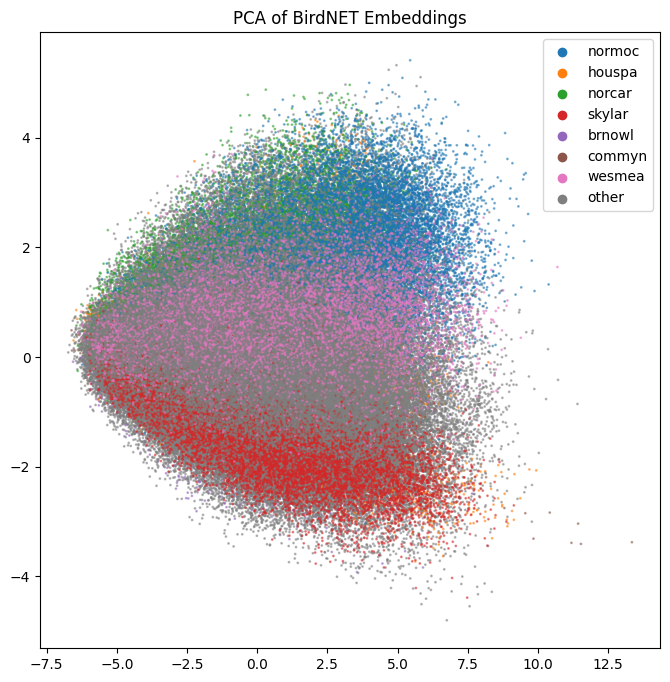

In [57]:
# perform pca on the embeddings and plot the results
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


def plot(X, reducer, title=None, colors=None, color_map=None):
    fig = plt.figure(figsize=(8, 8))
    emb = reducer.fit_transform(X)
    plt.scatter(emb[:, 0], emb[:, 1], s=1, alpha=0.5, c=colors, cmap="tab10")
    if title is not None:
        plt.title(title)
    # legend
    for species, color in color_map.items():
        plt.scatter([], [], c=color, label=species)
    plt.legend()
    plt.show()


# lets color the points by the 8 most common species
k = 7
top_species = df["species"].value_counts().index[:k].tolist()
color_map = {species: f"C{i}" for i, species in enumerate(top_species)}
color_map["other"] = f"C{k}"
colors = df["species"].apply(lambda x: color_map.get(x, f"C{k}"))

X = np.stack(df["emb"].values)
plot(
    X,
    PCA(n_components=2),
    title="PCA of BirdNET Embeddings",
    colors=colors,
    color_map=color_map,
)

UMAP( verbose=True)
Mon Jan  2 23:24:42 2023 Construct fuzzy simplicial set
Mon Jan  2 23:24:42 2023 Finding Nearest Neighbors
Mon Jan  2 23:24:42 2023 Building RP forest with 29 trees
Mon Jan  2 23:24:46 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	Stopping threshold met -- exiting after 6 iterations
Mon Jan  2 23:24:59 2023 Finished Nearest Neighbor Search
Mon Jan  2 23:25:00 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [01:10]


Mon Jan  2 23:27:33 2023 Finished embedding


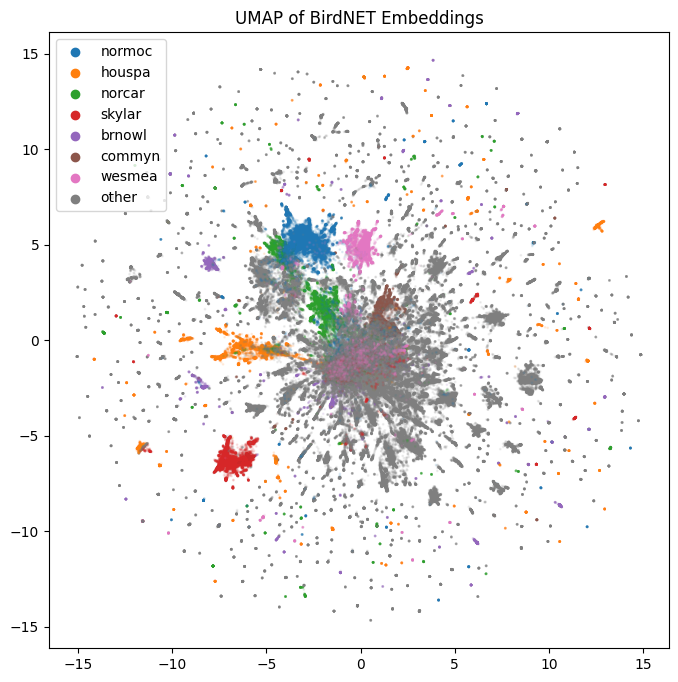

In [45]:
# plot using umap
import umap

plot(
    X,
    umap.UMAP(n_components=2, verbose=True),
    title="UMAP of BirdNET Embeddings",
    colors=colors,
    color_map=color_map,
)

UMAP( verbose=True)
Mon Jan  2 23:40:04 2023 Construct fuzzy simplicial set
Mon Jan  2 23:40:04 2023 Finding Nearest Neighbors
Mon Jan  2 23:40:04 2023 Building RP forest with 12 trees
Mon Jan  2 23:40:04 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon Jan  2 23:40:05 2023 Finished Nearest Neighbor Search
Mon Jan  2 23:40:05 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:08]


Mon Jan  2 23:40:14 2023 Finished embedding


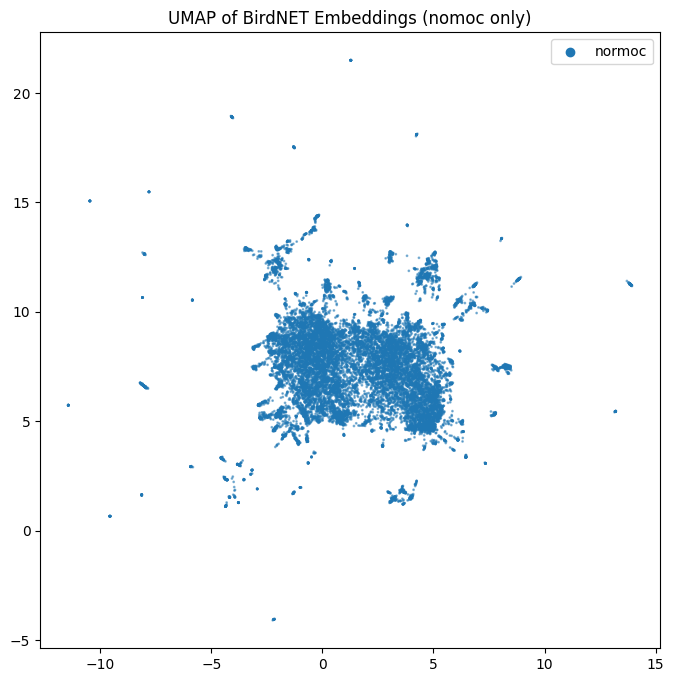

In [58]:
# umap embeddings again, but only with normoc embeddings

species = "normoc"
single_df = df[df["species"] == species]

plot(
    np.stack(single_df.emb.values),
    umap.UMAP(n_components=2, verbose=True),
    title=f"UMAP of BirdNET Embeddings ({species} only)",
    colors=["C0" for _ in range(len(single_df))],
    color_map={species: "C0"},
)

UMAP( verbose=True)
Mon Jan  2 23:40:36 2023 Construct fuzzy simplicial set
Mon Jan  2 23:40:36 2023 Finding Nearest Neighbors
Mon Jan  2 23:40:36 2023 Finished Nearest Neighbor Search
Mon Jan  2 23:40:36 2023 Construct embedding


Epochs completed: 100%| ██████████ 500/500 [00:03]


Mon Jan  2 23:40:40 2023 Finished embedding


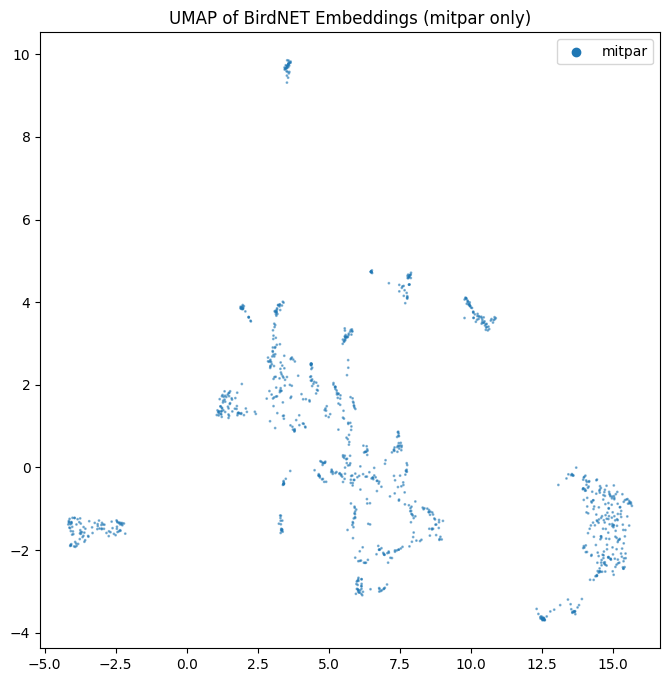

In [59]:
# plot it again, but with a less common species

species = df["species"].value_counts().index[50]
single_df = df[df["species"] == species]

plot(
    np.stack(single_df.emb.values),
    umap.UMAP(n_components=2, verbose=True),
    title=f"UMAP of BirdNET Embeddings ({species} only)",
    colors=["C0" for _ in range(len(single_df))],
    color_map={species: "C0"},
)

In [60]:
species = df["species"].value_counts().index[0]
species_idx = df["species"] == species
X = np.stack(df.emb.values)
emb_global = umap.UMAP(n_components=2, verbose=True).fit_transform(X)

UMAP( verbose=True)
Mon Jan  2 23:50:12 2023 Construct fuzzy simplicial set
Mon Jan  2 23:50:12 2023 Finding Nearest Neighbors
Mon Jan  2 23:50:12 2023 Building RP forest with 29 trees
Mon Jan  2 23:50:16 2023 NN descent for 18 iterations
	 1  /  18
	 2  /  18
	 3  /  18
	 4  /  18
	 5  /  18
	 6  /  18
	Stopping threshold met -- exiting after 6 iterations
Mon Jan  2 23:50:27 2023 Finished Nearest Neighbor Search
Mon Jan  2 23:50:29 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [01:11]


Mon Jan  2 23:53:24 2023 Finished embedding


In [61]:
emb_local = umap.UMAP(n_components=2, verbose=True).fit_transform(X[species_idx])

UMAP( verbose=True)
Mon Jan  2 23:53:26 2023 Construct fuzzy simplicial set
Mon Jan  2 23:53:26 2023 Finding Nearest Neighbors
Mon Jan  2 23:53:26 2023 Building RP forest with 12 trees
Mon Jan  2 23:53:26 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	 6  /  14
	Stopping threshold met -- exiting after 6 iterations
Mon Jan  2 23:53:27 2023 Finished Nearest Neighbor Search
Mon Jan  2 23:53:28 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:08]


Mon Jan  2 23:53:36 2023 Finished embedding


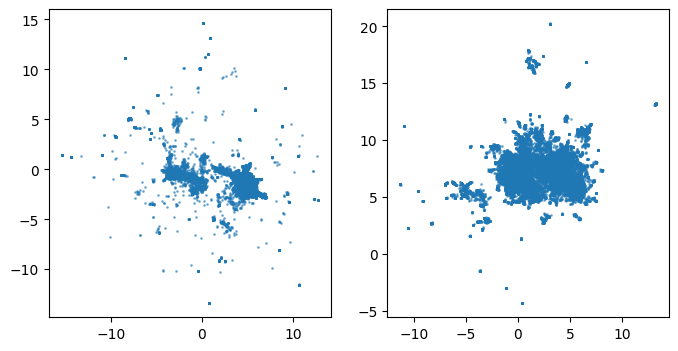

In [64]:
# plot these side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
# plot subset
ax1.scatter(emb_global[species_idx, 0], emb_global[species_idx, 1], s=1, alpha=0.5)
ax2.scatter(emb_local[:, 0], emb_local[:, 1], s=1, alpha=0.5)

plt.show()